# Определение перспективного тарифа для телеком-компании

В компании «Мегалайн» — федеральном операторе сотовой связи клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
В ходе исследования предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов
- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных из файлов

In [1]:
# импорт необходимых библиотек
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import calendar
from scipy import stats as st

### Таблица users (информация о пользователях)

In [2]:
# чтение файла с данными и сохранение в df_users
df_users = pd.read_csv('/datasets/users.csv')

In [98]:
#подготовка функции для получения общей информации о таблице
def data_info(data):
    display(data.head(), data.info(), data.describe())

In [99]:
#получение общей информации о таблице df_users
data_info(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
user_id             500 non-null int64
age                 500 non-null int64
churn_date          38 non-null datetime64[ns]
city                500 non-null object
first_name          500 non-null object
last_name           500 non-null object
reg_date            500 non-null datetime64[ns]
tariff              500 non-null object
reg_date_month      500 non-null int64
churn_date_month    500 non-null int64
use_date            500 non-null int64
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 43.1+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month,use_date
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,8
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,12,2
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,12,7
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,12,5
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,12,8


None

,user_id,age,reg_date_month,churn_date_month,use_date
count,500.00,500.00,500.00,500.00,500.00
mean,"1,249.50",46.59,6.48,11.91,6.43
std,144.48,16.67,3.39,0.45,3.37
min,"1,000.00",18.00,1.00,8.00,1.00
25%,"1,124.75",32.00,4.00,12.00,3.00
50%,"1,249.50",46.00,7.00,12.00,6.00
75%,"1,374.25",62.00,9.00,12.00,9.00
max,"1,499.00",75.00,12.00,12.00,12.00


Таблица состоит из 8 столбцов, содержащих общую информацию о пользователях:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) 
- city — город проживания пользователя
- tarif — название тарифного плана

В таблице содержится информация о 500 пользователях. Пропуски имеются в столбце churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Остальные стольбцы пропущенных значений не имеют. В столбцах churn_date и reg_date необходимо изменение типа данных с object на datetime. Типы данных в остальных столбцах соответствуют специфике столбцов.

### Таблица calls (информация о звонках)

In [5]:
# чтение файла с данными и сохранение в df_calls
df_calls = pd.read_csv('/datasets/calls.csv')

In [6]:
#получение общей информации о таблице df_calls
data_info(df_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


(       id   call_date  duration  user_id
 0  1000_0  2018-07-25      0.00     1000
 1  1000_1  2018-08-17      0.00     1000
 2  1000_2  2018-06-11      2.85     1000
 3  1000_3  2018-09-21     13.80     1000
 4  1000_4  2018-12-15      5.18     1000,
 None,
         duration    user_id
 count 202,607.00 202,607.00
 mean        6.76   1,253.94
 std         5.84     144.72
 min         0.00   1,000.00
 25%         1.30   1,126.00
 50%         6.00   1,260.00
 75%        10.70   1,379.00
 max        38.00   1,499.00)

Таблица состоит из 4 столбцов, содержащих информацию о звонках пользователей:

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Пропущенных значений нет. В столбце call_date необходимо изменение типа данных с object на datetime. Типы данных в остальных столбцах соответствуют специфике столбцов.

In [7]:
#подготовка функции для получения общей информации о таблице
def data_info_2(data):
    display(data.head(), data.info(), data.describe())

### Таблица messages (информация о сообщениях)

In [8]:
# чтение файла с данными и сохранение в df_messages
df_messages = pd.read_csv('/datasets/messages.csv')

In [9]:
#получение общей информации о таблице df_messages
data_info(df_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


(       id message_date  user_id
 0  1000_0   2018-06-27     1000
 1  1000_1   2018-10-08     1000
 2  1000_2   2018-08-04     1000
 3  1000_3   2018-06-16     1000
 4  1000_4   2018-12-05     1000,
 None,
          user_id
 count 123,036.00
 mean    1,256.99
 std       143.52
 min     1,000.00
 25%     1,134.00
 50%     1,271.00
 75%     1,381.00
 max     1,499.00)

Таблица состоит из 3 столбцов, содержащих информацию о сообщениях пользователей:

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Пропущенных значений нет. В столбце message_date необходимо изменение типа данных с object на datetime. Типы данных в остальных столбцах соответствуют специфике столбцов.

### Таблица internet (информация об интернет-сессиях)

In [10]:
# чтение файла с данными и сохранение в df_internet
df_internet = pd.read_csv('/datasets/internet.csv')

In [11]:
# получение общей информации о данных о таблице df_internet
data_info(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


(   Unnamed: 0      id  mb_used session_date  user_id
 0           0  1000_0   112.95   2018-11-25     1000
 1           1  1000_1 1,052.81   2018-09-07     1000
 2           2  1000_2 1,197.26   2018-06-25     1000
 3           3  1000_3   550.27   2018-08-22     1000
 4           4  1000_4   302.56   2018-09-24     1000,
 None,
        Unnamed: 0    mb_used    user_id
 count  149,396.00 149,396.00 149,396.00
 mean    74,697.50     370.19   1,252.10
 std     43,127.05     278.30     144.05
 min          0.00       0.00   1,000.00
 25%     37,348.75     138.19   1,130.00
 50%     74,697.50     348.01   1,251.00
 75%    112,046.25     559.55   1,380.00
 max    149,395.00   1,724.83   1,499.00)

Таблица состоит из 5 столбцов, содержащих информацию об интернет-сессиях пользователей:

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Пропущенных значений нет. В столбце session_date необходимо изменение типа данных с object на datetime. Типы данных в остальных столбцах соответствуют специфике столбцов.

### Таблица tariffs (информация о тарифах)

In [12]:
# чтение файла с данными и сохранение в df_tariffs
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [13]:
# получение таблицы df_tariffs
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
# получение информаии о типах данных в таблице df_tariffs
df_tariffs.dtypes

messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object

Таблица состоит из 8 столбцов, содержащих информацию о тарифах компании:

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Пропущенных значений нет. Типы данных в столбцах соответствуют специфике столбцов.

### Вывод

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. 
В таблицах users, calls, messages и internet в столбцах, содержащих даты, необходимо изменение типа данных.

## Предобработка данных и проведение дополнительных расчетов

### Таблица users (информация о пользователях)

Изучим подробнее данные содержащиеся в таблице. Проведем необходимую предобработку.

In [15]:
# получение первой строки таблицы
df_users.head(1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [16]:
# получение максимального и минимального значения столбца user_id
df_users.user_id.min(), df_users.user_id.max()

(1000, 1499)

In [17]:
# получение значений столбца age
df_users['age'].value_counts().sort_index(ascending=True)

18     6
19     9
20     9
21    12
22     5
23     9
24     9
25     7
26    11
27     9
28     9
29    11
30     9
31     7
32     7
33     5
34     5
35     7
36    10
37    11
38     5
39    11
40    12
41    10
42    14
43     7
44     8
45    10
46     7
47    11
48     9
49     4
50     9
51     9
52    10
53    14
54     6
55     8
56     9
57     4
58    10
59     6
60     8
61     3
62     8
63    13
64    13
65     9
66     9
67     7
68     9
69     8
70    10
71    13
72     5
73    12
74     7
75     6
Name: age, dtype: int64

In [18]:
#изменение типа данных в столбце churn_date
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [19]:
# получение значений столбца age
df_users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Подольск            1
Химки               1
Нижневартовск       1
Иваново             1
Name: city, Length: 76, dtype: int64

In [20]:
# получение значений столбца age
df_users['first_name'].value_counts()

Радим        6
Леонид       5
Пётр         5
Александр    4
Кристина     4
            ..
Галина       1
Дайна        1
Юрий         1
Леся         1
Гарри        1
Name: first_name, Length: 246, dtype: int64

In [21]:
# получение значений столбца age
df_users['last_name'].value_counts()

Андреенко    5
Абашкина     3
Аркадьев     3
Анищенко     3
Березина     3
            ..
Абалакова    1
Алюшина      1
Елизаров     1
Чумаков      1
Ахматов      1
Name: last_name, Length: 419, dtype: int64

In [22]:
#изменение типа данных 
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['reg_date'].min()

Timestamp('2018-01-01 00:00:00')

In [23]:
# получение значений столбца age
df_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [24]:
# подсчет дубликатв
df_users.duplicated().sum()

0

<a id='use_date'></a>
Добавим в таблицу столбец use_date, содержащий информацию о том, на протяжении скольких месяцев в 2018 году каждый клиент пользовался своим тарифом. Данные для столбца посчитаем как разницу между датой отключения и датой подключения (если пользование было прекращено) или как разницу между декабрем 2018 года и датой подключения (если пользование прекращено не было). Для проведения расчетов добавим столбцы reg_date_month и churn_date_month, содержащие месяц подключения к тарифу и отключения от тарифа соответственно.

In [25]:
# добавление столбца
df_users['reg_date_month'] = df_users['reg_date'].dt.month
df_users['churn_date_month'] = df_users['churn_date'].dt.month
df_users['churn_date_month'] = df_users['churn_date_month'].fillna(12).astype('int')
df_users['use_date'] = df_users['churn_date_month'] - df_users['reg_date_month'] + 1
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month,use_date
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,8
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,12,2
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,12,7
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,12,5
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,12,8
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8,12,5
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,1,12,12
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10,12,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,4


Данные в таблице корректны. Пропусков, дубликатов или ошибок внесения данных не выявлено. В столбцах reg_date и churn_date изменен тип данных на datetime.

Добавлен столбец use_date, содержащий количество месяцев, в течении которых осуществлялось пользование тарифами.

Всего таблица содержит данные о 500 пользователях возрастом от 18 до 75 лет. Большинство пользователей (20%) из г. Москва. Тариф smart встречается гораздо чаще чем ultra.

### Таблица calls (информация о звонках)

Изучим подробнее содержащиеся в таблице данные. Проведем необходимую предобработку. Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.

In [26]:
# получение первой строки таблицы
df_calls.head(1)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000


In [27]:
# получение значений столбца id
df_calls['id'].value_counts()

1101_187    1
1101_101    1
1414_125    1
1407_67     1
1344_512    1
           ..
1171_359    1
1217_18     1
1039_451    1
1264_170    1
1225_415    1
Name: id, Length: 202607, dtype: int64

In [28]:
#изменение типа данных, получение минимального и максимального значений
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['call_date'].min(), df_calls['call_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [29]:
#получение общей информации столбца duration
df_calls['duration'].describe()

count   202,607.00
mean          6.76
std           5.84
min           0.00
25%           1.30
50%           6.00
75%          10.70
max          38.00
Name: duration, dtype: float64

In [30]:
#подсчет количества нулевых значений столбца duration
len(df_calls.query('duration == 0'))

39613

In [31]:
#определение минимального значения столбца duration
df_calls.query('duration != 0').min()

id                       1000_10
call_date    2018-01-01 00:00:00
duration                    0.01
user_id                     1000
dtype: object

In [32]:
#подсчет количества значений столбца duration менее 0.1
len(df_calls.query('duration != 0 and duration < 0.1'))

742

In [33]:
# получение значений столбца id
df_calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [34]:
#подсчет количества дубликатов
df_calls.duplicated().sum()

0

<a id='user_not_call'></a>
В таблице содержатся данные о звонках, совершенных пользователями в 2018 году. Длительность звонков лежит в диапазоне от 0.01 до 38 минут, нулями обозначены пропущенные звонки (таких звонков почти 40 тысяч). Средняя продолжительность звонков - 6.76 минут. Количество звонков по каждому пользователю от 14 до 1760 за год. Из 500 пользователей звонки совершали 492. Определим какие пользователи не совершали звонков.

In [35]:
#выявление пользователей, отсутствующих в df_calls
user_call = set(df_calls['user_id'].tolist())
user_all = list(range(1000, 1500))
user_not_call = []
for elem in user_all:
    if elem not in user_call:
        user_not_call.append(elem)
user_not_call

[1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489]

In [36]:
set(range(1000, 1500)) - set(df_calls['user_id'].tolist())

{1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489}

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого добавим в таблицу столбец month_calls, содержащий месяц, в котором совершен звонок.

«Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. В столбец duration_min сохраним длительность каждого звонка после округления.

In [37]:
#добавление в таблицу столбца, содержащего месяц совершения звонка
df_calls['month_calls'] = df_calls['call_date'].astype('datetime64[M]')

In [38]:
#добавление в таблицу столбца, содержащего длительность звонков после округления
df_calls['duration_min'] = np.ceil(df_calls['duration']).astype(int)
df_calls.head()

,id,call_date,duration,user_id,month_calls,duration_min
0,1000_0,2018-07-25,0.00,1000,2018-07-01,0
1,1000_1,2018-08-17,0.00,1000,2018-08-01,0
2,1000_2,2018-06-11,2.85,1000,2018-06-01,3
3,1000_3,2018-09-21,13.80,1000,2018-09-01,14
4,1000_4,2018-12-15,5.18,1000,2018-12-01,6


Посчитаем для каждого пользователя количество сделанных звонков (count_calls) и израсходованных минут (sum_duration_calls) разговора по месяцам. Сохраним полученные данные в таблицу df_calls_agg. Добавим столбец user_month, содержащий id пользователя и месяц совершения звонка, он понадобится для дальнейшего объединения таблиц.<a id='2.2'></a>

In [39]:
#подготовка сводной таблицы с расчетами
df_calls_agg = df_calls.groupby(['user_id', 'month_calls']).agg(count_calls=('id','count'),sum_duration_calls=('duration_min','sum'))
df_calls_agg = df_calls_agg.reset_index()
df_calls_agg = df_calls_agg.assign(user_month = df_calls_agg.user_id.astype(str) + ',' + df_calls_agg.month_calls.astype(str))
df_calls_agg.head()

,user_id,month_calls,count_calls,sum_duration_calls,user_month
0,1000,2018-05-01,22,159,"1000,2018-05-01"
1,1000,2018-06-01,43,172,"1000,2018-06-01"
2,1000,2018-07-01,47,340,"1000,2018-07-01"
3,1000,2018-08-01,52,408,"1000,2018-08-01"
4,1000,2018-09-01,58,466,"1000,2018-09-01"


In [40]:
#получение общей информации столбца count_messages
df_calls_agg['count_calls'].describe()

count   3,174.00
mean       63.83
std        32.68
min         1.00
25%        41.00
50%        63.00
75%        83.00
max       244.00
Name: count_calls, dtype: float64

In [41]:
#получение общей информации столбца count_messages
df_calls_agg['sum_duration_calls'].describe()

count   3,174.00
mean      456.93
std       238.03
min         0.00
25%       290.00
50%       447.00
75%       592.00
max     1,673.00
Name: sum_duration_calls, dtype: float64

In [42]:
df_calls_agg.query('sum_duration_calls == 0')

,user_id,month_calls,count_calls,sum_duration_calls,user_month
1493,1240,2018-02-01,2,0,"1240,2018-02-01"
1605,1257,2018-07-01,1,0,"1257,2018-07-01"
1606,1257,2018-08-01,2,0,"1257,2018-08-01"
1607,1257,2018-09-01,1,0,"1257,2018-09-01"
2318,1373,2018-01-01,2,0,"1373,2018-01-01"
2321,1373,2018-04-01,1,0,"1373,2018-04-01"


### Таблица messages (информация о сообщениях)

Изучим подробнее содержащиеся в таблице данные. Проведем необходимую предобработку. Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [43]:
#получение первой строки таблицы
df_messages.head(1)

,id,message_date,user_id
0,1000_0,2018-06-27,1000


In [44]:
# получение значений столбца id
df_messages['id'].value_counts()

1039_214    1
1004_287    1
1373_221    1
1296_236    1
1280_181    1
           ..
1174_150    1
1155_564    1
1335_431    1
1338_205    1
1004_301    1
Name: id, Length: 123036, dtype: int64

In [45]:
#изменение типа данных, получение минимального и максимального значений
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['message_date'].min(), df_messages['message_date'].max()

(Timestamp('2018-01-02 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [46]:
# получение значений столбца user_id
df_messages['user_id'].value_counts()

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

In [47]:
#подсчет количества дубликатов
df_messages.duplicated().sum()

0

<a id='user_not_messages'></a>
В таблице содержатся данные о сообщениях, отправленных пользователями в 2018 году. Из 500 пользователей сообщения отправляли 426. Определим какие пользователи не отправляли сообщений.

In [48]:
#выявление пользователей, отсутствующих в df_messages
user_messages = set(df_messages['user_id'].tolist())
user_not_messages = []
for elem in user_all:
    if elem not in user_messages:
        user_not_messages.append(elem)
len(user_not_messages)

74

Посчитаем количество отправленных сообщений по месяцам. Для этого добавим в таблицу столбец month_messages, содержащий месяц, в котором отправлено сообщение. 

In [49]:
#добавление в таблицу столбца, содержащего месяц отправления сообщения
df_messages['month_messages'] = df_messages['message_date'].astype('datetime64[M]')
df_messages.head()

,id,message_date,user_id,month_messages
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


Посчитаем для каждого пользователя количество отправленных сообщений (count_messages) по месяцам. Сохраним полученные данные в таблицу df_messages_agg. Добавим столбец user_month, содержащий id пользователя и месяц отправления сообщения, он понадобится для дальнейшего объединения таблиц. <a id='2.3'></a>

In [50]:
#подготовка сводной таблицы с расчетами
df_messages_agg = df_messages.groupby(['user_id', 'month_messages']).agg(count_messages=('id','count'))
df_messages_agg = df_messages_agg.reset_index()
df_messages_agg = df_messages_agg.assign(user_month = df_messages_agg.user_id.astype(str) + ',' + df_messages_agg.month_messages.astype(str))
df_messages_agg.head()

,user_id,month_messages,count_messages,user_month
0,1000,2018-05-01,22,"1000,2018-05-01"
1,1000,2018-06-01,60,"1000,2018-06-01"
2,1000,2018-07-01,75,"1000,2018-07-01"
3,1000,2018-08-01,81,"1000,2018-08-01"
4,1000,2018-09-01,57,"1000,2018-09-01"


In [51]:
#получение общей информации столбца count_messages
df_messages_agg['count_messages'].describe()

count   2,717.00
mean       45.28
std        35.05
min         1.00
25%        19.00
50%        38.00
75%        63.00
max       224.00
Name: count_messages, dtype: float64

### Таблица internet (информация об интернет-сессиях)

Изучим подробнее содержащиеся в таблице данные. Проведем необходимую предобработку. Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [52]:
#получение первой строки таблицы
df_internet.head(1)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000


In [53]:
# получение значений столбца id
df_internet['id'].value_counts()

1039_214    1
1325_74     1
1155_551    1
1214_54     1
1204_780    1
           ..
1155_353    1
1090_7      1
1163_0      1
1328_2      1
1120_14     1
Name: id, Length: 149396, dtype: int64

In [54]:
#получение общей информации столбца mb_used
df_internet['mb_used'].describe()

count   149,396.00
mean        370.19
std         278.30
min           0.00
25%         138.19
50%         348.01
75%         559.55
max       1,724.83
Name: mb_used, dtype: float64

In [55]:
#подсчет количества нулевых значений столбца mb_used
mb_null = df_internet.query('mb_used == 0')
mb_null

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.00,2018-08-28,1000
38,38,1000_38,0.00,2018-11-27,1000
46,46,1000_46,0.00,2018-06-30,1000
67,67,1000_67,0.00,2018-06-16,1000
72,72,1000_72,0.00,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.00,2018-12-11,1499
149381,149381,1499_142,0.00,2018-11-01,1499
149383,149383,1499_144,0.00,2018-11-27,1499
149386,149386,1499_147,0.00,2018-10-21,1499


В таблице содержится 19 598 нулевых интернет-сессий (13%).Учитывая то, что в таких сессиях трафик не расходовался, удалим их.

In [56]:
#удаление нулевых интернет-сессий
df_internet = df_internet.drop(df_internet[df_internet.mb_used == 0].index)

In [57]:
#подсчет количества значений столбца mb_used менее 0.1
df_internet.query('mb_used < 0.1')

,Unnamed: 0,id,mb_used,session_date,user_id
11027,11027,1038_76,0.07,2018-12-30,1038
11399,11399,1040_22,0.07,2018-11-23,1040
12506,12506,1044_143,0.08,2018-11-18,1044
15944,15944,1055_402,0.03,2018-06-15,1055
19101,19101,1065_246,0.08,2018-03-17,1065
27569,27569,1096_77,0.09,2018-07-09,1096
85722,85722,1291_278,0.04,2018-08-10,1291
102165,102165,1341_280,0.09,2018-08-29,1341
108198,108198,1370_3,0.06,2018-07-18,1370
124847,124847,1421_32,0.08,2018-11-15,1421


In [58]:
#получение общей информации столбца mb_used
df_internet['mb_used'].describe()

count   129,798.00
mean        426.09
std         255.60
min           0.03
25%         227.46
50%         400.54
75%         592.95
max       1,724.83
Name: mb_used, dtype: float64

In [59]:
#изменение типа данных, получение минимального и максимального значений
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['session_date'].min(), df_internet['session_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [60]:
# получение значений столбца id
df_internet['user_id'].value_counts()

1240    731
1385    725
1496    693
1227    691
1180    651
       ... 
1062     29
1467     26
1343     26
1192     21
1399      8
Name: user_id, Length: 497, dtype: int64

In [61]:
#подсчет количества дубликатов

df_internet.duplicated().sum()

0

<a id='user_not_internet'></a>
В таблице содержатся данные об интернет-сессиях пользователей в 2018 году. Объем израсходованного за сессию интернет-трафика лежит в диапазоне от 0.03 до 1,724.83 мегабайт, среднее значение - 426 мегабайта.  Нулевые интернет-сессий удалены. Из 500 пользователей пользовались интернетом 497. Определим какие пользователи не пользовались интернетом.

In [62]:
#выявление пользователей, отсутствующих в df_internet
user_internet = set(df_internet['user_id'].tolist())
user_not_internet = []
for elem in user_all:
    if elem not in user_internet:
        user_not_internet.append(elem)
user_not_internet

[1128, 1273, 1371]

Посчитаем объем израсходованного интернет-трафика по месяцам. Для этого добавим в таблицу столбец month_internet, содержащий месяц, в котором совершена интернет-сессия.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. 1 гигабайт = 1024 мегабайта. В столбец sum_internet сохраним объем израсходованного интернет-трафика по месяцам после перевода и округления.

Сохраним полученные данные в таблицу df_internet_agg. Добавим столбец user_month, содержащий id пользователя и месяц проведения интернет-сессии, он понадобится для дальнейшего объединения таблиц. <a id='2.4'></a>

In [63]:
#добавление в таблицу столбца, содержащего месяц проведения интернет-сессии
df_internet['month_internet'] = df_internet['session_date'].astype('datetime64[M]')

In [64]:
#подготовка сводной таблицы с расчетами
df_internet_agg = df_internet.groupby(['user_id', 'month_internet']).agg(sum_internet=('mb_used','sum'))
df_internet_agg['sum_internet'] = np.ceil(df_internet_agg['sum_internet']/1024).astype(int)
df_internet_agg = df_internet_agg.reset_index()
df_internet_agg = df_internet_agg.assign(user_month = df_internet_agg.user_id.astype(str) + ',' + df_internet_agg.month_internet.astype(str))
df_internet_agg.head()

,user_id,month_internet,sum_internet,user_month
0,1000,2018-05-01,3,"1000,2018-05-01"
1,1000,2018-06-01,23,"1000,2018-06-01"
2,1000,2018-07-01,14,"1000,2018-07-01"
3,1000,2018-08-01,14,"1000,2018-08-01"
4,1000,2018-09-01,15,"1000,2018-09-01"


In [65]:
#получение общей информации столбца sum_internet
df_internet_agg['sum_internet'].describe()

count   3,201.00
mean       17.37
std         7.33
min         1.00
25%        13.00
50%        17.00
75%        21.00
max        49.00
Name: sum_internet, dtype: float64

### Подготовка сводной таблицы

В подразделах работы 2.2, 2.3 и 2.4 составлены сводные таблицы:
- [df_calls_agg](#2.2) (содержится количество сделанных звонков и израсходованных минут разговора по месяцам)
- [df_messages_agg](#2.3) (содержится количество отправленных сообщений по месяцам)
- [df_internet_agg](#2.4) (содержится объем израсходованного интернет-трафика по месяцам)

Для дальнейшей работы объеденим полученные данные в одну таблицу df_total. Для объединения используем специально созданный для этого столбец user_month, содержащий id пользователя и порядковый номер месяца, в котором произошли звонок, отправка сообщения или интернет-сессия.



In [66]:
# объединение таблиц с результатами расчетов
df_total = df_calls_agg.merge(df_messages_agg, on='user_month', how='outer')
df_total = df_total.merge(df_internet_agg, on='user_month', how='outer')
df_total.tail()

,user_id_x,month_calls,count_calls,sum_duration_calls,user_month,user_id_y,month_messages,count_messages,user_id,month_internet,sum_internet
3209,nan,NaT,nan,nan,"1489,2018-09-01","1,489.00",2018-09-01,32.00,"1,489.00",2018-09-01,17.00
3210,nan,NaT,nan,nan,"1489,2018-10-01","1,489.00",2018-10-01,21.00,"1,489.00",2018-10-01,20.00
3211,nan,NaT,nan,nan,"1489,2018-11-01","1,489.00",2018-11-01,20.00,"1,489.00",2018-11-01,18.00
3212,nan,NaT,nan,nan,"1489,2018-12-01","1,489.00",2018-12-01,35.00,"1,489.00",2018-12-01,17.00
3213,nan,NaT,nan,nan,"1476,2018-04-01",nan,NaT,nan,"1,476.00",2018-04-01,1.00


В результате объединения трех таблиц образовалось 3 варианта столбцов user_id (user_id, user_id_x и user_id_y) и month (month_calls, month_messages и month_internet) разной степени наполненности. Глобальными будем считать столбцы user_id и month. Заполним в глобальных столбцах пропуски данными из других соответствующих локальных столбцов. Изменим тип данных в указанных столбцах на целочисленый. Порядковый номер месяца в столбце month заменим на его название.

In [67]:
#заполнение пропусков в столбце user_id
df_total['user_id'] = df_total['user_id'].fillna(df_total['user_id_x'])
df_total['user_id'] = df_total['user_id'].fillna(df_total['user_id_y'])
df_total['user_id'] = df_total['user_id'].astype('int')

In [68]:
#заполнение пропусков в столбце month
df_total['month'] = df_total['month_calls']
df_total['month'] = df_total['month'].fillna(df_total['month_messages'])
df_total['month'] = df_total['month'].fillna(df_total['month_internet'])

In [69]:
#подсчет количества пропущенных значений в столбцах user_id и month
df_total['month'].isna().sum(), df_total['user_id'].isna().sum()

(0, 0)

Для удобства работы соберем из df_total новую таблицу df, состоящую из следующих столбцов:
- user_id (уникальный идентификатор пользователя),
- month (месяц пользования тарифом),
- count_calls (количество сделанных звонков по месяцам),
- sum_duration_calls (количество израсходованных минут разговора по месяцам),
- count_messages (количество отправленных сообщений по месяцам),
- sum_internet (объем израсходованного интернет-трафика по месяцам)

Пропущенные значения в столбцах count_calls, sum_duration_calls, count_messages и sum_internet уместно заменить 0.

In [70]:
#подготовка таблицы df
df = df_total[['user_id', 'month', 'count_calls', 'sum_duration_calls', 'count_messages', 'sum_internet']]
df.sort_values(by=['user_id'])

,user_id,month,count_calls,sum_duration_calls,count_messages,sum_internet
0,1000,2018-05-01,22.00,159.00,22.00,3.00
1,1000,2018-06-01,43.00,172.00,60.00,23.00
2,1000,2018-07-01,47.00,340.00,75.00,14.00
3,1000,2018-08-01,52.00,408.00,81.00,14.00
4,1000,2018-09-01,58.00,466.00,57.00,15.00
...,...,...,...,...,...,...
3169,1498,2018-10-01,41.00,247.00,42.00,21.00
3173,1499,2018-12-01,69.00,492.00,66.00,13.00
3170,1499,2018-09-01,9.00,70.00,11.00,2.00
3171,1499,2018-10-01,68.00,449.00,48.00,18.00


In [71]:
#заполнение пропусков 0
df = df.fillna(0)

Напоследок добавим в таблицу данные пользователей, для этого объеденим таблицы df и df_users.

In [72]:
#объединение таблиц
df = df.merge(df_users, on='user_id', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
user_id               3216 non-null int64
month                 3214 non-null datetime64[ns]
count_calls           3214 non-null float64
sum_duration_calls    3214 non-null float64
count_messages        3214 non-null float64
sum_internet          3214 non-null float64
age                   3216 non-null int64
churn_date            189 non-null datetime64[ns]
city                  3216 non-null object
first_name            3216 non-null object
last_name             3216 non-null object
reg_date              3216 non-null datetime64[ns]
tariff                3216 non-null object
reg_date_month        3216 non-null int64
churn_date_month      3216 non-null int64
use_date              3216 non-null int64
dtypes: datetime64[ns](3), float64(4), int64(5), object(4)
memory usage: 427.1+ KB


Ранее выявлены пользователи, которые не совершали звонков ([user_not_call](#user_not_call), 8 человек), не отправляли сообщений ([user_not_messages](#user_not_messages), 74 человека), не пользовались интернетом ([user_not_internet](#user_not_internet), 3 человека). Двое клиентов (1128 и 1371) не пользовались ни тем, ни другим, ни третим. Посмотрим информацию по ним в таблице df_users.

In [73]:
#супер пассивные клиенты «Мегалайна»
df_users.query('user_id == 1128 or user_id == 1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month,use_date
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12,1
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12,1


Клиенты 1128 и 1371 были подключены и перестали пользоваться своими тарифами в декабре 2018 года. Они не совершали звонков, не отправляли сообщений и не пользовались интернетом, но,вероятнее всего, абонентскую плату внесли. В столбце month за счет них появились два пропущенных значения. Для них в столбце month заменим пропуски на 12, те декабрь, месяц когда они были подключены и отключены от тарифов. В столбцах count_calls, sum_duration_calls, count_messages и sum_internet пропуски заменим на 0.

In [74]:
df['month'] = df['month'].fillna(12)
df[['count_calls', 'sum_duration_calls', 'count_messages', 'sum_internet']] = df[['count_calls', 'sum_duration_calls', 'count_messages', 'sum_internet']].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
user_id               3216 non-null int64
month                 3216 non-null object
count_calls           3216 non-null float64
sum_duration_calls    3216 non-null float64
count_messages        3216 non-null float64
sum_internet          3216 non-null float64
age                   3216 non-null int64
churn_date            189 non-null datetime64[ns]
city                  3216 non-null object
first_name            3216 non-null object
last_name             3216 non-null object
reg_date              3216 non-null datetime64[ns]
tariff                3216 non-null object
reg_date_month        3216 non-null int64
churn_date_month      3216 non-null int64
use_date              3216 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(5), object(5)
memory usage: 427.1+ KB


### Расчет помесячной выручки для каждого пользователя

Расчитаем помесячную выручку с каждого пользователя. Для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика. Затем остаток умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану. Результат расчетов внесем в таблицу df в столбец pay_total.

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 
   1. минута разговора: 3 рубля; 
   2. сообщение: 3 рубля; 
   3. 1 Гб интернет-трафика: 200 рублей.


**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 
   1. минута разговора: 1 рубль; 
   2. сообщение: 1 рубль; 
   3. 1 Гб интернет-трафика: 150 рублей.

In [75]:
# вызов таблицы df_tariffs
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [76]:
#сохранение условий тарифов в переменных
messages_included_smart = df_tariffs.loc[0, 'messages_included']
mb_per_month_included_smart = (df_tariffs.loc[0, 'mb_per_month_included']) /1024
minutes_included_smart = df_tariffs.loc[0, 'minutes_included']
rub_monthly_fee_smart = df_tariffs.loc[0, 'rub_monthly_fee']
rub_per_gb_smart = df_tariffs.loc[0, 'rub_per_gb']
rub_per_message_smart = df_tariffs.loc[0, 'rub_per_message']
rub_per_minute_smart = df_tariffs.loc[0, 'rub_per_minute']

messages_included_ultra = df_tariffs.loc[1, 'messages_included']
mb_per_month_included_ultra = (df_tariffs.loc[1, 'mb_per_month_included']) /1024
minutes_included_ultra = df_tariffs.loc[1, 'minutes_included']
rub_monthly_fee_ultra = df_tariffs.loc[1, 'rub_monthly_fee']
rub_per_gb_ultra = df_tariffs.loc[1, 'rub_per_gb']
rub_per_message_ultra = df_tariffs.loc[1, 'rub_per_message']
rub_per_minute_ultra = df_tariffs.loc[1, 'rub_per_minute']

In [77]:
#добавление в таблицу столбца pay_total, содержащего помесячную выручку с каждого пользователя
def pay_total(row):
    sum_duration_calls = row['sum_duration_calls']
    count_messages = row['count_messages']
    sum_internet = row['sum_internet']
    tariff = row['tariff']
    if tariff == 'ultra':
        per_message = (count_messages - messages_included_ultra) * rub_per_message_ultra
        messages_pay = per_message if count_messages > messages_included_ultra else 0
        per_minute = (sum_duration_calls - minutes_included_ultra) * rub_per_minute_ultra
        minute_pay = per_minute if sum_duration_calls > minutes_included_ultra else 0
        per_gb = (sum_internet - mb_per_month_included_ultra) * rub_per_gb_ultra
        gb_pay = per_gb if sum_internet > mb_per_month_included_ultra else 0
        pay_total = rub_monthly_fee_ultra + messages_pay + minute_pay + gb_pay
        return pay_total
    if tariff == 'smart':
        per_message = (count_messages - messages_included_smart) * rub_per_message_smart
        messages_pay = per_message if count_messages > messages_included_smart else 0
        per_minute = (sum_duration_calls - minutes_included_smart) * rub_per_minute_smart
        minute_pay = per_minute if sum_duration_calls > minutes_included_smart else 0
        per_gb = (sum_internet - mb_per_month_included_smart) * rub_per_gb_smart
        gb_pay = per_gb if sum_internet > mb_per_month_included_smart else 0
        pay_total = rub_monthly_fee_smart + messages_pay + minute_pay + gb_pay
        return pay_total
   
df['pay_total'] = df.apply(pay_total, axis=1)

In [78]:
#получение последних 5 строк таблицы
df.sort_values(by=['user_id']).tail()

,user_id,month,count_calls,sum_duration_calls,count_messages,sum_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,churn_date_month,use_date,pay_total
3168,1498,2018-07-01 00:00:00,23.00,175.00,20.00,8.00,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,4,550.00
3175,1499,2018-12-01 00:00:00,69.00,492.00,66.00,13.00,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,4,598.00
3172,1499,2018-09-01 00:00:00,9.00,70.00,11.00,2.00,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,4,550.00
3174,1499,2018-11-01 00:00:00,74.00,612.00,59.00,18.00,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,4,"1,513.00"
3173,1499,2018-10-01 00:00:00,68.00,449.00,48.00,18.00,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,4,"1,150.00"


Могла сложится такая ситуация, что кто-то из клиентов в некоторые месяцы не пользовался никакими из услуг связи, оплачивая при этом ежемесячную абонентскую плату. Такие месяцы могли не попасть в сводную таблицу. Следует проверить не пропущенны ли у кого-то из пользователей месяцы в столбце month.

Ранее в разделе [2.1](#use_date) работы в таблицу df_users был добавлен столбец use_date, содержащий количество месяцев 2018 года, в течении которых каждый из пользователей был подключен к тарифу (разница в месяцах между декабрем 2018 года (или датой прекращения пользования тарифом) и датой подключения тарифа). 

Сравним количество месяцев пользования в столбцах month	и use_date. Для этого сгруппируем данные таблицы по каждому пользователю и посчитаем количество месяцев в группировках. Затем в получивщуюся сводную таблицу month_count_fact добавим столбец use_date. Значения в этих столбцах должны совпадать, иначе исходные данные можно считать не полными, будет требоваться доработка.

In [79]:
#создание сводной таблицы
month_count_fact = df.groupby('user_id')['month'].count()
month_count_fact = month_count_fact.reset_index()
month_count_fact['plan'] = df_users['use_date']
month_count_fact

,user_id,month,plan
0,1000,8,8
1,1001,2,2
2,1002,7,7
3,1003,5,5
4,1004,8,8
...,...,...,...
495,1495,5,5
496,1496,12,12
497,1497,3,3
498,1498,4,4


In [80]:
#получение строк таблицы, в которых имеются расхождения
month_count_fact.query('month != plan').count()

user_id    0
month      0
plan       0
dtype: int64

### Вывод

Проведена предобработка данных: в таблицах users, calls, messages и internet в столбцах, содержащих даты, изменен тип данных, в таблице internet удалены нулевые интернет-сессии.

Проведены расчеты и составлены сводные таблицы:
- df_calls_agg (содержится количество сделанных звонков и израсходованных минут разговора по месяцам)
- df_messages_agg (содержится количество отправленных сообщений по месяцам)
- df_internet_agg (содержится объем израсходованного интернет-трафика по месяцам)

Полученные сводные таблицы и таблица df_users объеденены в общую таблицу df. В эту таблицу также добавлена помесячная выручка для каждого пользователя.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Выясним сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Для этого посчитаем среднее количество, дисперсию и стандартное отклонение для каждой из услуг связи в разрезе тарифов. Результаты расчетов сохраним в таблице df_agg. Затем, применив правило трёх сигм, выясним потребности пользователей по каждому из тарифов.

In [81]:
#расчет среднего количества, дисперсии и стандартного отклонения
df_agg = df.groupby(['tariff']).agg({'sum_duration_calls': ['mean', 'var', 'std'],
                                   'count_messages': ['mean', 'var', 'std'],
                                   'sum_internet': ['mean', 'var', 'std']}) 
df_agg

sum_duration_calls                   count_messages                 \
                     mean        var    std           mean      var   std   
tariff                                                                      
smart              417.75  36,281.39 190.48          33.37   796.96 28.23   
ultra              526.09 101,052.49 317.89          49.31 2,285.42 47.81   

       sum_internet             
               mean   var  std  
tariff                          
smart         16.32 33.13 5.76  
ultra         19.47 97.38 9.87

In [82]:
#применение правила трех сигм для длительности звонков
sm_min = df_agg[("sum_duration_calls", "mean")].loc[('smart')]+3*df_agg[("sum_duration_calls", "std")].loc[('smart')]
ul_min = df_agg[("sum_duration_calls", "mean")].loc[('ultra')]+3*df_agg[("sum_duration_calls", "std")].loc[('ultra')]
f'Пользователям тарифа smart необходимо {sm_min.round(2)} минут разговора в месяц, а пользователям тарифа ultra - {ul_min.round(2)}'

'Пользователям тарифа smart необходимо 989.18 минут разговора в месяц, а пользователям тарифа ultra - 1479.75'

In [83]:
#применение правила трех сигм для количества сообщений
sm_mes = df_agg[("count_messages", "mean")].loc[('smart')]+3*df_agg[("count_messages", "std")].loc[('smart')]
ul_mes = df_agg[("count_messages", "mean")].loc[('ultra')]+3*df_agg[("count_messages", "std")].loc[('ultra')]
f'Пользователям тарифа smart необходимо {sm_mes.round(2)} сообщений в месяц, а пользователям тарифа ultra - {ul_mes.round(2)}'

'Пользователям тарифа smart необходимо 118.06 сообщений в месяц, а пользователям тарифа ultra - 192.73'

In [84]:
#применение правила трех сигм для объема интернет-трафика
sm_in = df_agg[("sum_internet", "mean")].loc[('smart')]+3*df_agg[("sum_internet", "std")].loc[('smart')]
ul_in = df_agg[("sum_internet", "mean")].loc[('ultra')]+3*df_agg[("sum_internet", "std")].loc[('ultra')]
f'Пользователям тарифа smart необходимо {sm_in.round(2)} Гб интернета в месяц, а пользователям тарифа ultra - {ul_in.round(2)}'

'Пользователям тарифа smart необходимо 33.59 Гб интернета в месяц, а пользователям тарифа ultra - 49.08'

Пользователи тарифа ultra расходуют в 1,5 раза больше минут, сообщений и Гб, чем на тарифе smart. При этом в конце месяца у них остается значительное количество неизрасходованных минут разговора и сообщений, а Гб сильно не хватает.

Пользователи тарифа smart гораздо более экономные, но, тем не менее, в рамки своего тарифа они не укладываюся, им требуется примерно вдвое больше минут, сообщений и Гб.

Возможно, такое значительное превышение лимита обеспечено редкими чрезмерно активными пользователями. Для ответа на этот вопрос построим гистограммы для каждой из услуг связи. Для сравнительного анализа пользователей разных тарифов разобъем общую таблицу df на две части, разделив по тарифам. <a id='раздел3'></a>

In [85]:
#разделение таблицы df на две части
smart = df.query('tariff == "smart"')
ultra = df.query('tariff == "ultra"')

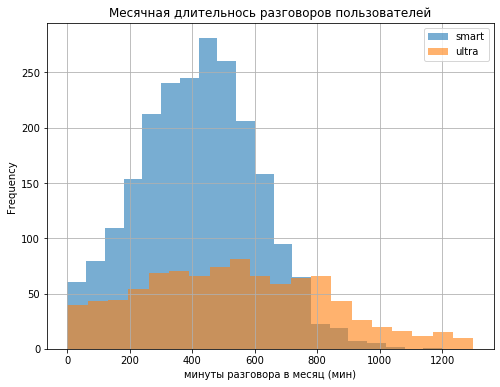

In [86]:
#построение гистограммы: звонки
ax = smart.plot(y='sum_duration_calls', kind='hist', alpha=0.6, label='smart', bins=20, range=(0.001, 1200))
ultra.plot(y='sum_duration_calls', kind='hist', ax=ax, figsize=(8, 6), alpha=0.6, label='ultra', range=(0.001, 1300),
                                 title='Месячная длительнось разговоров пользователей', bins=20, grid=True)

plt.xlabel('минуты разговора в месяц (мин)');

В тариф smart включено 500 минут разговора, а в ultra - 3000.

Обе гистограммы имеют по одной вершине. В обоих случаях присутствует некоторая скошенность влево. Это логично, учитывая специфику данных. 

Гистограмма по тарифу ultra имеет более сглаженные очертания в связи с меньшим количеством объектов в выборке, а гистограмма по тарифу smart имеет крутой равномерный подъем к вершине, расположенной в диапазоне значений от 300 до 500, и чуть более крутой спуск от нее.

В целом гистограммы подтверждают ранее полученные расчетные данные. Действительно, примерно 25% пользователей тарифа smart превышают лемит своего тарифа по минутам разговора, а пользователи тарифа ultra не расходуют даже половины от оплаченных минут.

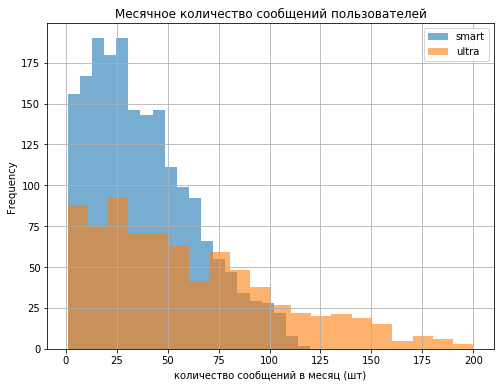

In [87]:
#построение гистограммы: сообщения
ax = smart.plot(y='count_messages', kind='hist', alpha=0.6, label='smart', bins=20, range=(1, 120))
ultra.plot(y='count_messages', kind='hist', ax=ax, figsize=(8, 6), alpha=0.6, label='ultra',
                                 title='Месячное количество сообщений пользователей', bins=20, grid=True, range=(1, 200))

plt.xlabel('количество сообщений в месяц (шт)');

В тариф smart включено 50 сообщений, а в ultra - 1000.

Обе гистограммы имеют перекошенную вправо форму, слева резко отсеченную. Это нормально учитывая специфику столбца. 

Гистограмма по тарифу smart имеет крутую вершину в диапазоне 20-30 сообщений в месяц, затем крутой спуск до 50 сообщений и далее крутой равномерный спуск к отметке 120 сообщений.

Гистограмма по тарифу ultra имеет более сглаженные очертания с пиком значений в диапазоне от 1 до 30 сообщений и немного реже - от 30 до 50. Крайне редко количество отправленных сообщений превышает значение 200.

В целом гистограммы подтверждают ранее полученные расчетные данные. Действительно, пользователи тарифа smart зачастую не укладываются в лемит своего тарифа по количеству сообщений, а пользователям тарифа ultra достаточно 20% от предусмотренного количества.

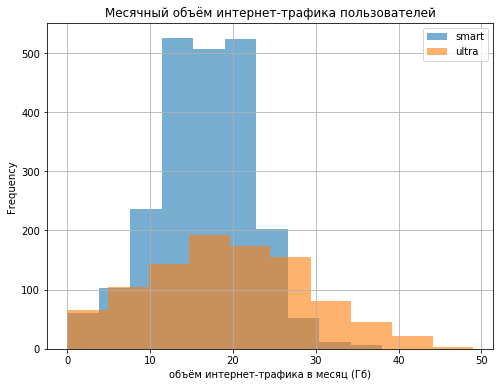

In [88]:
#построение гистограммы: интернет
ax = smart.plot(y='sum_internet', kind='hist', alpha=0.6, label='smart', bins=10)
ultra.plot(y='sum_internet', kind='hist', ax=ax, figsize=(8, 6), alpha=0.6, label='ultra',
                                 title='Месячный объём интернет-трафика пользователей', bins=10, grid=True)

plt.xlabel('объём интернет-трафика в месяц (Гб)');

В тариф smart включено 15 Гб интернета, а в ultra - 30.

Обе гистограммы имеют по одной вершине и симметричное распредление значений в стороны от нее.

Гистограмма по тарифу ultra имеет более сглаженные очертания в связи с меньшим количеством объектов в выборке, а гистограмма по тарифу smart имеет крутой равномерный подъем к вершине, расположенной в диапазоне значений от 12 до 17.

В целом гистограммы подтверждают ранее полученные расчетные данные. Действительно, пользователям обоих тарифов не достаточно оплаченного объема интернет-трафика, причем среди пользователей тарифа smart почти каждый второй превышает выделенный лемит.

### Вывод

В ходе работы определено сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Результат представлен в сводной таблице need.

In [89]:
need = pd.DataFrame({'': ['smart', 'ultra'], 'minutes': [sm_min.round(2), ul_min.round(2)],
                                             'messages': [sm_mes.round(2), ul_mes.round(2)], 
                                             'Gb': [sm_in.round(2), ul_in.round(2)]})
need

,,minutes,messages,Gb
0,smart,989.18,118.06,33.59
1,ultra,"1,479.75",192.73,49.08


Выявлено, что пользователи тарифа smart значительно превышают установленный лимит по минутам разговора, количеству сообщений и по объему интернет-трафика. Пользователи тарифа ultra превышают установленный лимит по объему интернет-трафика, не расходуя при этом значительное количество оплаченных минут и сообщений. Для визуализации построены столбчатые диаграммы.

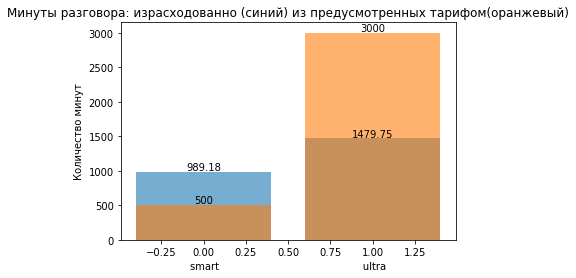

In [90]:
# построение столбчатой диаграммы: минуты разговора
min_f = [sm_min.round(2), ul_min.round(2)]
min_p = [minutes_included_smart, minutes_included_ultra]
plt.bar(range(2), min_f, alpha=0.6, label="Smoker = No")
plt.bar(range(2), min_p, alpha=0.6, label="Smoker = No")
for i, t in enumerate(min_f):
    plt.text(i, t + (np.max(min_f) * 0.009), t, ha="center")
for i, t in enumerate(min_p):
    plt.text(i, t + (np.max(min_p) * 0.009), t, ha="center")
plt.title("Минуты разговора: израсходованно (синий) из предусмотренных тарифом(оранжевый)")
plt.xlabel("smart                                              ultra")
plt.ylabel("Количество минут");

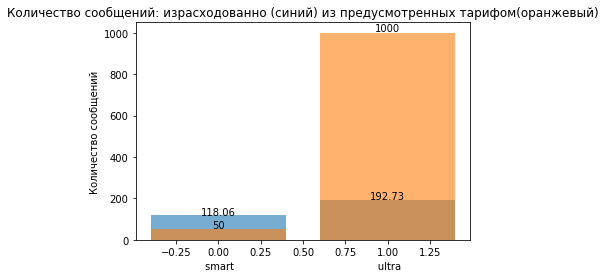

In [91]:
#построение столбчатой диаграммы: количество сообщений
mes_f = [sm_mes.round(2), ul_mes.round(2)]
mes_p = [messages_included_smart, messages_included_ultra]
plt.bar(range(2), mes_f, alpha=0.6)
plt.bar(range(2), mes_p, alpha=0.6)
for i, t in enumerate(mes_f):
    plt.text(i, t + (np.max(mes_f) * 0.009), t, ha="center")
for i, t in enumerate(mes_p):
    plt.text(i, t + (np.max(mes_p) * 0.009), t, ha="center")
    
plt.title("Количество сообщений: израсходованно (синий) из предусмотренных тарифом(оранжевый)")
plt.xlabel("smart                                              ultra")
plt.ylabel("Количество сообщений");

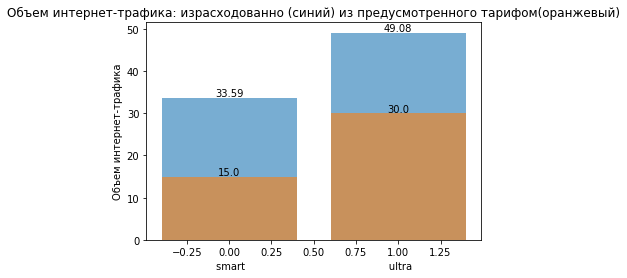

In [92]:
#построение столбчатой диаграммы: объем интернет-трафика
in_f = [sm_in.round(2), ul_in.round(2)]
in_p = [mb_per_month_included_smart, mb_per_month_included_ultra]
plt.bar(range(2), in_f, alpha=0.6)
plt.bar(range(2), in_p, alpha=0.6)
for i, t in enumerate(in_f):
    plt.text(i, t + (np.max(in_f) * 0.009), t, ha="center")
for i, t in enumerate(in_p):
    plt.text(i, t + (np.max(in_p) * 0.009), t, ha="center")
    
plt.title("Объем интернет-трафика: израсходованно (синий) из предусмотренного тарифом(оранжевый)")
plt.xlabel("smart                                              ultra")
plt.ylabel("Объем интернет-трафика");

## Проверка гипотез

### Сравнение средней выручки по тарифам

Проанализируем годовую выручку для пользователей разных тарифов. Учитывая условия тарифов, можно предположить, что выручка пользователей тарифа ultra превышает выручку пользователей тарифа smart.
Для начала сформулируем нулевую гипотезу. Учтем, что нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. 

В нашем случае нулевая гипотеза будет звучать так:

**Между средними выручками пользователей тарифов ultra и smart нет ожидаемого различия**

Альтернативная гипотеза:

**Средняя выручка пользователей тарифа ultra больше чем тарифа smart**

Чтобы проверить выдвинутое предположение проведем статстический тест для двух генеральных совокупностей по взятым из них выборкам. Выборку с данными помесячной выручки по тарифу smart поместим в pay_smart, по тарифу ultra - в pay_ultra. Отметим, что ранее в [разделе 3](#раздел3) для сравнительного анализа пользователей разных тарифов общая таблицу df уже была разбита на две части - smart и ultra. Уровень значимости для теста определим пороговым значением 5%. Основываясь на предположении альтернативной гипотезы (ultra > smart) установим односторонний критерий значимости. Применим метод scipy.stats.ttest_ind.

In [93]:
#подготовка выборок
pay_smart = smart['pay_total'].to_numpy()
pay_ultra = ultra['pay_total'].to_numpy()

In [94]:
#проведение статистического теста, расчет p-значения
alpha_tariff = 0.05
results_tariff = st.ttest_ind(pay_smart, pay_ultra)
'p-значение:', results_tariff.pvalue / 2

('p-значение:', 4.0409547777449665e-161)

Известно, что чем меньше p-значение, тем больше определенность в том, что нулевая гипотеза является ложной, и что мы нашли подлинный эффект. Приходим к выводу, что получить настолько малое p-значения в рамках нулевой гипотезы вряд ли возможно. Отвергаем нулевую гипотезу. 

По итогам проведения теста известно, что средняя выручка пользователей тарифа ultra отличается от тарифа smart. Удостоверимся в том, что больше выручка по тарифу ultra.

In [95]:
#проверка истинности альтернативы
results_tariff.pvalue / 2 < alpha_tariff and pay_smart.mean() < pay_ultra.mean()

True

### Сравнение средней выручки по городам

Проанализируем годовую выручку для пользователей проживающих в разных городах. Предположим, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Сформулируем нулевую гипотезу. Учтем, что нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.

В нашем случае нулевая гипотеза будет звучать так:

**Средние выручки пользователей из Москвы и пользователей из других регионов равны между собой.**

Альтернативная гипотеза:

**Средние выручки пользователей из Москвы и пользователей из других регионов отличаются.**

Чтобы проверить выдвинутое предположение проведем статстический тест для двух генеральных совокупностей по взятым из них выборкам. Выборку с данными помесячной выручки пользователей из Москвы поместим в pay_msk, по другим регионам - в pay_no_msk. Уровень значимости для теста определим пороговым значением 5%. Основываясь на предположении альтернативной гипотезы (Москва != другие регионы) установим двусторонний критерий значимости. Применим метод scipy.stats.ttest_ind.

In [96]:
#подготовка выборок
pay_msk = df.query('city == "Москва"')['pay_total'].to_numpy()
pay_no_msk = df.query('city != "Москва"')['pay_total'].to_numpy()

In [97]:
#проведение статистического теста, расчет p-значения
alpha_city = 0.05
results_city = st.ttest_ind(pay_msk, pay_no_msk)
'p-значение:', results_city.pvalue

('p-значение:', 0.5400751614511182)

Высокое p-значение не дает основания отвергнуть нулевую гипотезу. Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Вывод

Проведены статстические тесты для двух генеральных совокупностей по взятым из них выборкам. Установлено, что существует высокая вероятность истинности следующих предположений:
- Средняя выручка пользователей тарифа ultra больше чем тарифа smart.
- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод

В ходе исследования проведен предварительный анализ тарифов компании «Мегалайн» на небольшой выборке клиентов. 
Проанализировано поведение клиентов и выявлено сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц: 
- многие пользователи тарифа smart превышают установленный тарифом лимит сообщений, звонков и интернет-трафика; 
- многие пользователи тарифа ultra превышают установленный тарифом лимит интернет-трафика, а оплаченные минуты разговора и сообщения не используют в полном объеме.

Расчитана помесячная выручка с каждого пользователя:
- средняя выручка пользователей тарифа ultra больше чем тарифа smart,
- средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

**Учитывая то, что тариф ultra приносит больше денег, его развитие более выгодно для компании**